In [40]:
# open the file
file_name = '1M.txt'

strats = {}
cur_strat = ''

def line_to_dict(line):
  metric = {}
  kvs = line.split(', ')
  for kv in kvs:
    k, v = kv.split(': ')
    metric[k.lower()] = v
  return metric

with open(file_name, 'r') as file:
  lines = file.readlines()
  for line in lines:
    if line.startswith('['):
      cur_strat = line.strip().strip('[]').lower()
      strats[cur_strat] = []
    else:
      metric = line_to_dict(line)
      strats[cur_strat].append(metric)


In [41]:
# print out each key and the length of their list
for key in strats:
  print(key, len(strats[key]))

bincode 996369
huffman 996369
dynamic huffman 996369
opening huffman 996369


In [43]:
# print out the 1 metric from bincode
for k, v in strats['bincode'][0].items():
  print(k, v)


time to compress (seconds) 0.001128072
time to decompress (seconds) 0.000041585
compressed size (bits) 2248
decompressed size (bits) 4000
bits per move 38.101694915254235
bits per move excluding headers 28.88135593220339



In [48]:
# plot the time to compress for each strategy
import matplotlib.pyplot as plt

def plot_field(field):
  for key in strats:
    if key == 'bincode':
      continue

    times = [float(metric[field]) for metric in strats[key]]
    plt.scatter(range(len(times)), times, label=key, s=1, alpha=0.5)
    plt.legend()
    plt.show()



C:\Users\strud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


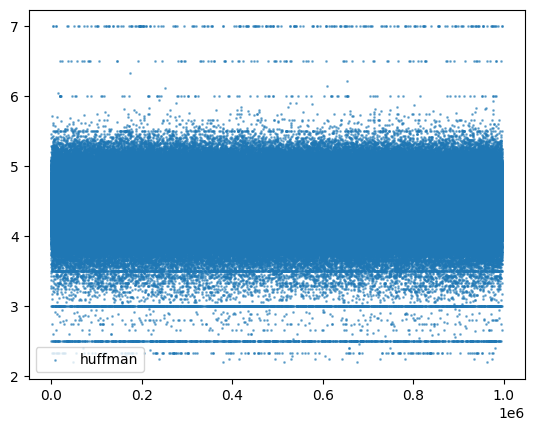

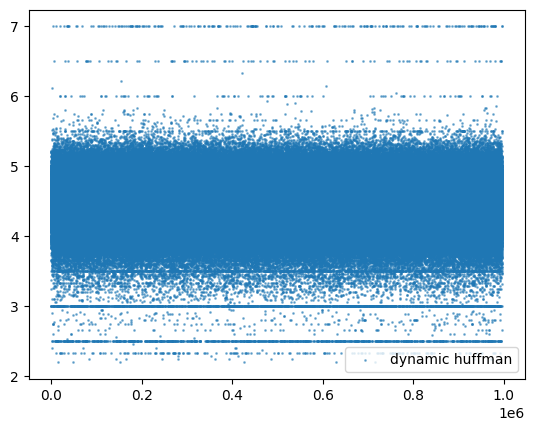

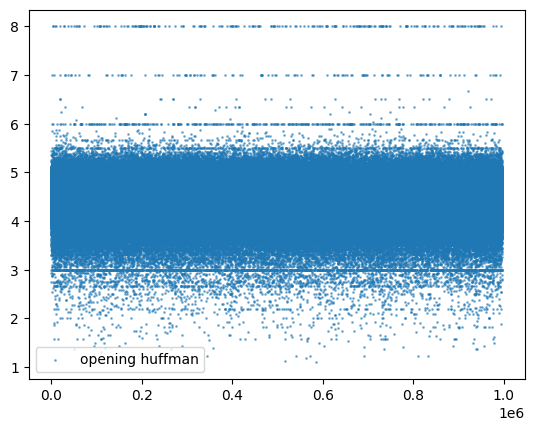

In [49]:
plot_field('bits per move excluding headers')

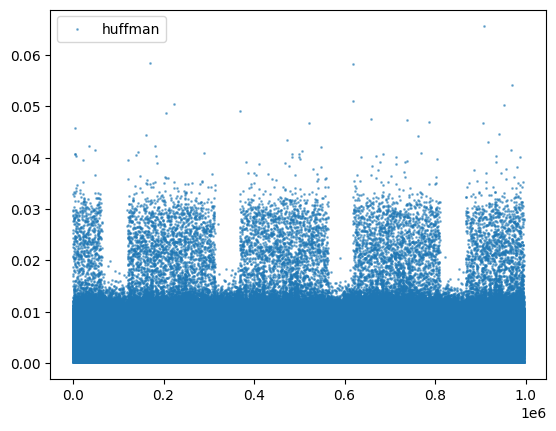

C:\Users\strud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


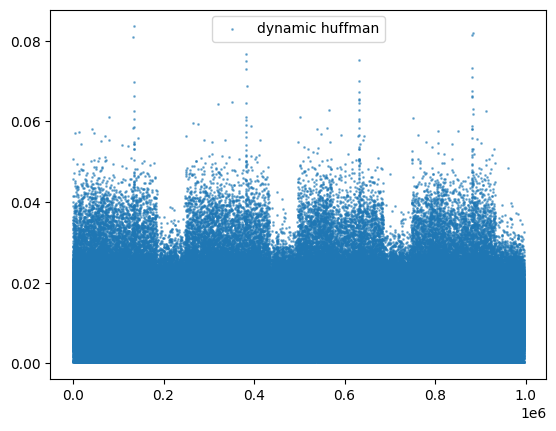

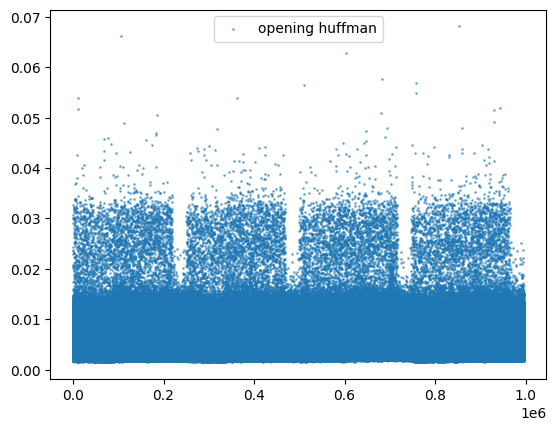

In [50]:
plot_field('time to compress (seconds)')

C:\Users\strud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


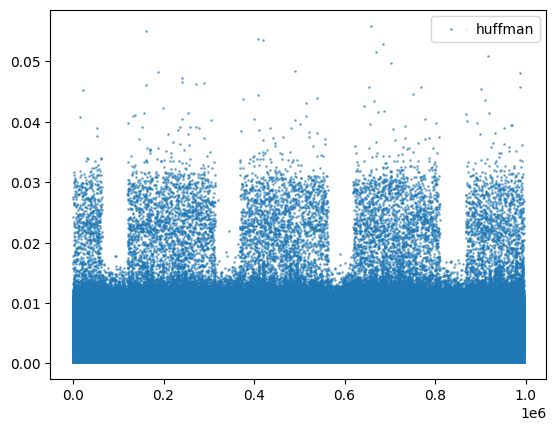

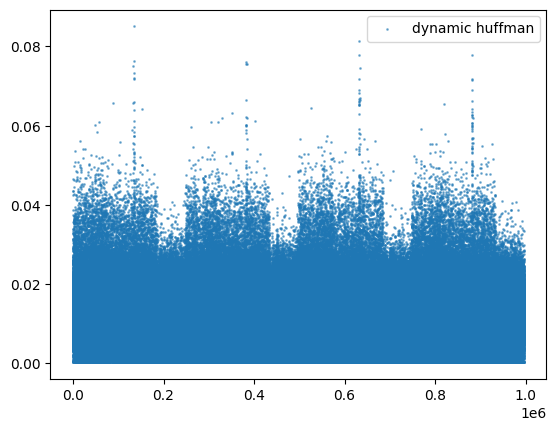

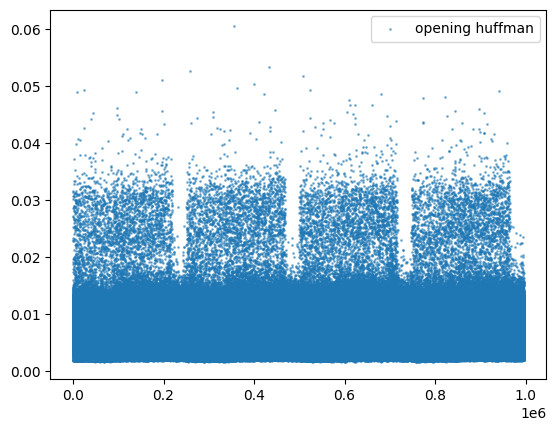

In [51]:
plot_field('time to decompress (seconds)')

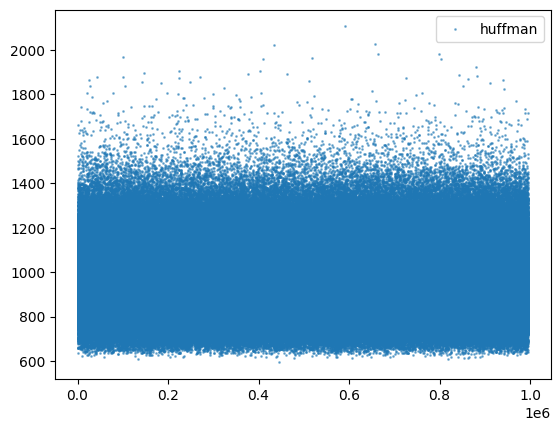

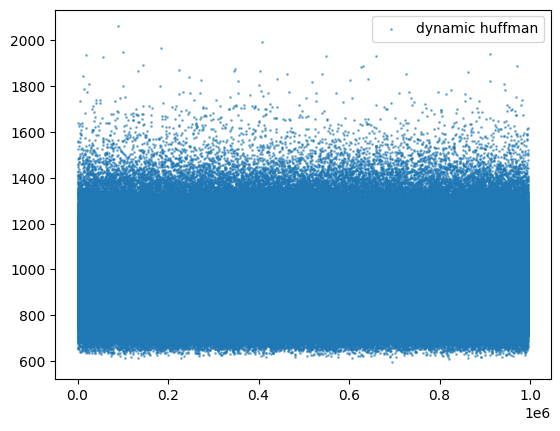

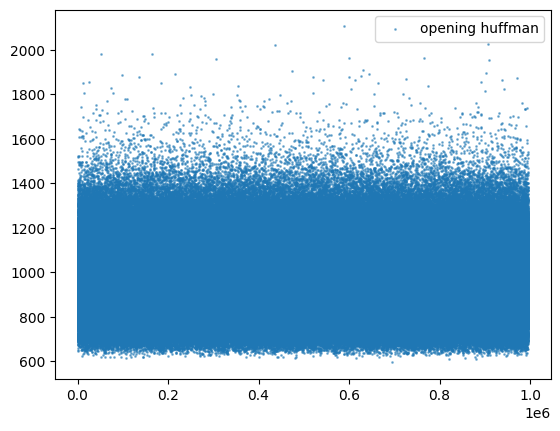

In [53]:
plot_field('compressed size (bits)')

C:\Users\strud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


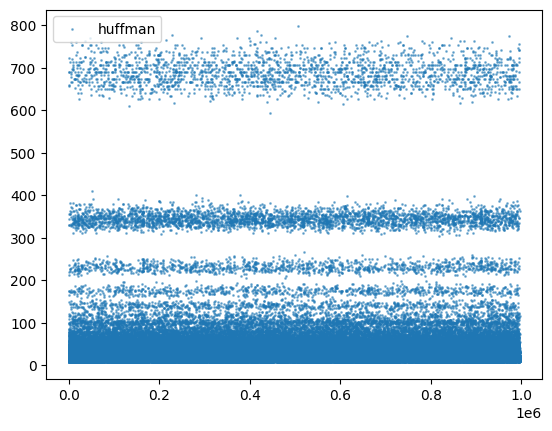

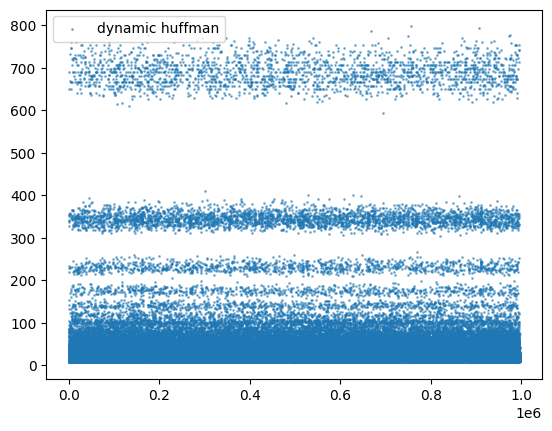

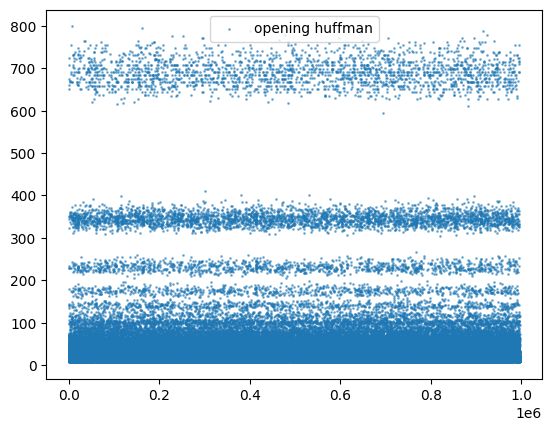

: 

In [54]:
plot_field('bits per move')